# Umap

In [1]:
import csv
import pandas as pd
import numpy as np
import umap
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import joblib

/home/ashleylyh/quickdraw/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-09-05 14:17:34.933736: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-05 14:17:34.968941: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-05 14:17:36.235228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly d

In [2]:

filepath = './embeddings.csv'
df = pd.read_csv(filepath)

In [3]:
df_select = df.loc[df['class'].isin([
  'crocodile',
  'fish',
  'rainbow',
  'rifle',
  'saw',
  'see saw',
  'shark',
  'hot air balloon',
  'ice cream',
  'lollipop',
  'mushroom',
  'umbrella',
  'bucket',
  'cake',
  'calculator',
  'computer',
  'crown',
  'hamburger',
  'laptop',
  'radio',
  'sailboat',
  'television',
  'angel',
  'bee',
  'campfire',
  'crab',
  'dragon',
  'grapes',
  'hedgehog',
  'helicopter',
  'octopus',
  'scorpion',
  'spider',
  'squirrel',
  'camera',
  'clock',
  'donut',
  'envelope',
  'map',
  'wheel',
  'apple',
  'lighter',
  'penguin',
  'pineapple',
  'snowman',
  'strawberry',
  'tornado',
  'ambulance',
  'bus',
  'car',
  'cloud',
  'police car',
  'school bus',
  'snail',
  'truck',
  'van',
  'ant',
  'bicycle',
  'camel',
  'cow',
  'eyeglasses',
  'horse',
  'rhinoceros',
  'sheep',
  'zebra',
  'butterfly',
  'flower',
  'palm tree',
  'snowflake',
  'sun',
  'tree',
  'windmill'])]
df_select

,class,class_id,original_index,e0,e1,e2,e3,e4,e5,e6,...,e502,e503,e504,e505,e506,e507,e508,e509,e510,e511
0,ambulance,0,124531,-0.981268,0.997420,-0.980448,-0.983959,0.667094,0.145938,-0.804226,...,-0.561107,-0.948976,1.000000,0.979677,0.828096,-0.993798,-0.999750,-0.913910,0.690792,-0.019124
1,ambulance,0,11733,-0.812547,0.964438,-0.959373,-0.259086,0.996876,0.630170,-0.996380,...,-0.973204,-0.994172,0.999903,0.650900,-0.440980,-0.995213,-0.825434,0.822330,-0.573541,0.592197
2,ambulance,0,115839,0.818790,0.464012,-0.862255,-0.925267,0.850136,-0.396022,-0.895632,...,0.137394,-0.921945,0.985143,0.668200,0.769520,-0.776454,-0.999609,0.243098,0.881320,0.710422
3,ambulance,0,67566,-0.893669,0.726728,0.247834,0.346493,0.862140,-0.858390,-0.920135,...,-0.901872,-0.581533,0.999809,0.918700,-0.599796,0.805933,-0.976621,0.421758,0.312308,0.148629
4,ambulance,0,88032,0.308319,0.474430,-0.934798,-0.898076,0.998458,-0.823093,-0.909660,...,-0.798747,0.017652,0.956060,-0.288751,0.990881,-0.602251,-0.999407,0.225556,0.526315,0.283429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493995,zebra,246,111893,-0.837951,0.895272,-0.818166,-0.807067,0.999677,-0.701309,-0.921097,...,-0.927497,0.481545,-0.554122,0.263107,0.994979,0.807895,-0.997277,-0.589023,0.266805,-0.223765
493996,zebra,246,72620,0.253992,0.701554,-0.178268,-0.663198,0.999798,-0.563300,0.587165,...,-0.962929,0.026841,-0.003426,0.520229,0.963152,0.864302,-0.999814,0.016635,-0.640339,0.829668
493997,zebra,246,75264,-0.959848,0.992864,-0.374530,0.601601,0.953400,-0.309065,-0.896205,...,-0.474510,0.671761,0.999992,-0.764753,0.999989,0.196441,-0.999334,-0.742324,0.588261,0.973831
493998,zebra,246,135165,-0.064154,0.985235,-0.918807,-0.258509,0.984218,-0.942557,-0.049226,...,-0.806086,0.746847,0.999237,-0.812953,0.995269,0.704340,-0.999972,0.315217,-0.364101,0.997353


In [4]:
# 抽取特徵矩陣
feature_cols = [c for c in df_select.columns if c.startswith("e")]
X_top72 = df_select[feature_cols].values
Y_top72 = df_select['class'].values


# UMAP (2D)
import umap
umap_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=15,
    min_dist=0.4
)

X_umap_top72 = umap_reducer.fit_transform(X_top72)

# 新的 DataFrame
df_72_umap = pd.DataFrame({
    "class": Y_top72,
    "umap_x": X_umap_top72[:,0],
    "umap_y": X_umap_top72[:,1]
})

/home/ashleylyh/quickdraw/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [5]:
Test_df = df_72_umap
print(Test_df['umap_x'].mean())
print(Test_df['umap_x'].std())
print(Test_df['umap_y'].mean())
print(Test_df['umap_y'].std())
Test_df['scale_x'] = (Test_df['umap_x'] - Test_df['umap_x'].mean())/Test_df['umap_x'].std()
Test_df['scale_y'] = (Test_df['umap_y'] - Test_df['umap_y'].mean())/Test_df['umap_y'].std()

8.418461
5.191731
6.8886104
4.9396496


In [6]:
def remove_cluster_outliers(df, cluster_col='cluster', x_col='scale_x', y_col='scale_y', iqr_threshold=1.5, min_cluster_size=5):
    """
    Remove outliers from each cluster using the IQR method.

    Args:
        df (pd.DataFrame): DataFrame with clustering results
        cluster_col (str): Column name for cluster labels
        x_col (str): Name of x-coordinate column
        y_col (str): Name of y-coordinate column
        iqr_threshold (float): IQR multiplier (e.g., 1.5 means keep points within 1.5*IQR)
        min_cluster_size (int): Minimum number of samples in a cluster for outlier detection

    Returns:
        pd.DataFrame: DataFrame with outliers removed
    """
    indices_to_keep = []

    for cluster_id in df[cluster_col].unique():
        cluster_mask = df[cluster_col] == cluster_id
        cluster_data = df[cluster_mask]

        if len(cluster_data) < min_cluster_size:
            indices_to_keep.extend(cluster_data.index)
            continue

        # IQR for x
        q1_x, q3_x = np.percentile(cluster_data[x_col], [25, 75])
        iqr_x = max(q3_x - q1_x, 1e-10)
        lower_x = q1_x - iqr_threshold * iqr_x
        upper_x = q3_x + iqr_threshold * iqr_x

        # IQR for y
        q1_y, q3_y = np.percentile(cluster_data[y_col], [25, 75])
        iqr_y = max(q3_y - q1_y, 1e-10)
        lower_y = q1_y - iqr_threshold * iqr_y
        upper_y = q3_y + iqr_threshold * iqr_y

        keep = ((cluster_data[x_col] >= lower_x) & (cluster_data[x_col] <= upper_x) &
                (cluster_data[y_col] >= lower_y) & (cluster_data[y_col] <= upper_y))

        indices_to_keep.extend(cluster_data.index[keep])

    filtered_df = df.loc[indices_to_keep].copy().reset_index(drop=True)
    # print original sample points:
    print(f"Original sample points: {len(df)}")
    # print filtered sample points:
    print(f"Filtered sample points: {len(filtered_df)}")
    print(f"Outlier removal (IQR={iqr_threshold}) complete: {len(df) - len(filtered_df)} outliers removed.")
    return filtered_df


In [7]:
filtered_df = remove_cluster_outliers(Test_df, cluster_col="class")
filtered_df

Original sample points: 146000
Filtered sample points: 131044
Outlier removal (IQR=1.5) complete: 14956 outliers removed.


,class,umap_x,umap_y,scale_x,scale_y
0,ambulance,12.975064,-2.097946,0.877666,-1.819270
1,ambulance,10.881312,-1.571544,0.474380,-1.712703
2,ambulance,10.644564,-0.217289,0.428779,-1.438543
3,ambulance,11.888103,-2.209491,0.668302,-1.841852
4,ambulance,13.406639,-0.180559,0.960793,-1.431107
...,...,...,...,...,...
131039,zebra,13.842249,6.951321,1.044697,0.012695
131040,zebra,13.959342,7.100641,1.067251,0.042924
131041,zebra,14.683667,7.106602,1.206766,0.044131
131042,zebra,13.629940,7.188266,1.003804,0.060663


In [8]:
cluster_map = {
    # Cluster 0
    "fish":0, "eyeglasses":0, "camel":0, "see saw":0, "bicycle":0, "shark":0,
    # Cluster 1
    "palm tree":1, "hot air balloon":1, "lollipop":1, "mushroom":1, "umbrella":1, "penguin":1, "tree":1, 
    # Cluster 2
    "spider":2, "octopus":2, "hedgehog":2, "campfire":2,"crab":2,"helicopter":2,
    # Cluster 3
    "ambulance":3, "police car":3, "car":3, "truck":3, "bus":3,
    # Cluster 4
    "radio":4, "map":4, "envelope":4, "camera":4, "calculator":4, "laptop":4,
    # Cluster 5
    "clock":5, "donut":5, "wheel":5, "ice cream":5, "apple":5, "strawberry":5}

# 新增 cluster 欄位
filtered_df["cluster"] = filtered_df["class"].map(cluster_map)
filtered_df = filtered_df.dropna()
filtered_df

print(
    filtered_df[['class','cluster']]
    .drop_duplicates(['class','cluster'])
    .sort_values(['cluster'])
    .to_string(index=False)
)

          class  cluster
        bicycle      0.0
          camel      0.0
     eyeglasses      0.0
           fish      0.0
          shark      0.0
        see saw      0.0
       lollipop      1.0
hot air balloon      1.0
      palm tree      1.0
       mushroom      1.0
        penguin      1.0
           tree      1.0
       umbrella      1.0
           crab      2.0
       hedgehog      2.0
     helicopter      2.0
        octopus      2.0
         spider      2.0
       campfire      2.0
      ambulance      3.0
            bus      3.0
          truck      3.0
     police car      3.0
            car      3.0
          radio      4.0
            map      4.0
         laptop      4.0
       envelope      4.0
         camera      4.0
     calculator      4.0
          clock      5.0
          apple      5.0
     strawberry      5.0
      ice cream      5.0
          donut      5.0
          wheel      5.0


In [9]:
print(filtered_df['umap_x'].mean())
print(filtered_df['umap_x'].std())
print(filtered_df['umap_y'].mean())
print(filtered_df['umap_y'].std())
filtered_df['scale_x'] = (filtered_df['umap_x'] - filtered_df['umap_x'].mean())/filtered_df['umap_x'].std()
filtered_df['scale_y'] = (filtered_df['umap_y'] - filtered_df['umap_y'].mean())/filtered_df['umap_y'].std()
filtered_df

6.99473
5.8490615
6.385308
5.7033243


/tmp/ipykernel_836707/348130812.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['scale_x'] = (filtered_df['umap_x'] - filtered_df['umap_x'].mean())/filtered_df['umap_x'].std()
/tmp/ipykernel_836707/348130812.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['scale_y'] = (filtered_df['umap_y'] - filtered_df['umap_y'].mean())/filtered_df['umap_y'].std()


,class,umap_x,umap_y,scale_x,scale_y,cluster
0,ambulance,12.975064,-2.097946,1.022443,-1.487423,3.0
1,ambulance,10.881312,-1.571544,0.664480,-1.395125,3.0
2,ambulance,10.644564,-0.217289,0.624003,-1.157675,3.0
3,ambulance,11.888103,-2.209491,0.836608,-1.506981,3.0
4,ambulance,13.406639,-0.180559,1.096229,-1.151235,3.0
...,...,...,...,...,...,...
127424,wheel,-0.940959,8.989419,-1.356746,0.456595,5.0
127425,wheel,-1.559783,7.825728,-1.462545,0.252558,5.0
127426,wheel,-0.569343,9.237383,-1.293211,0.500072,5.0
127427,wheel,-0.974098,9.182926,-1.362411,0.490524,5.0


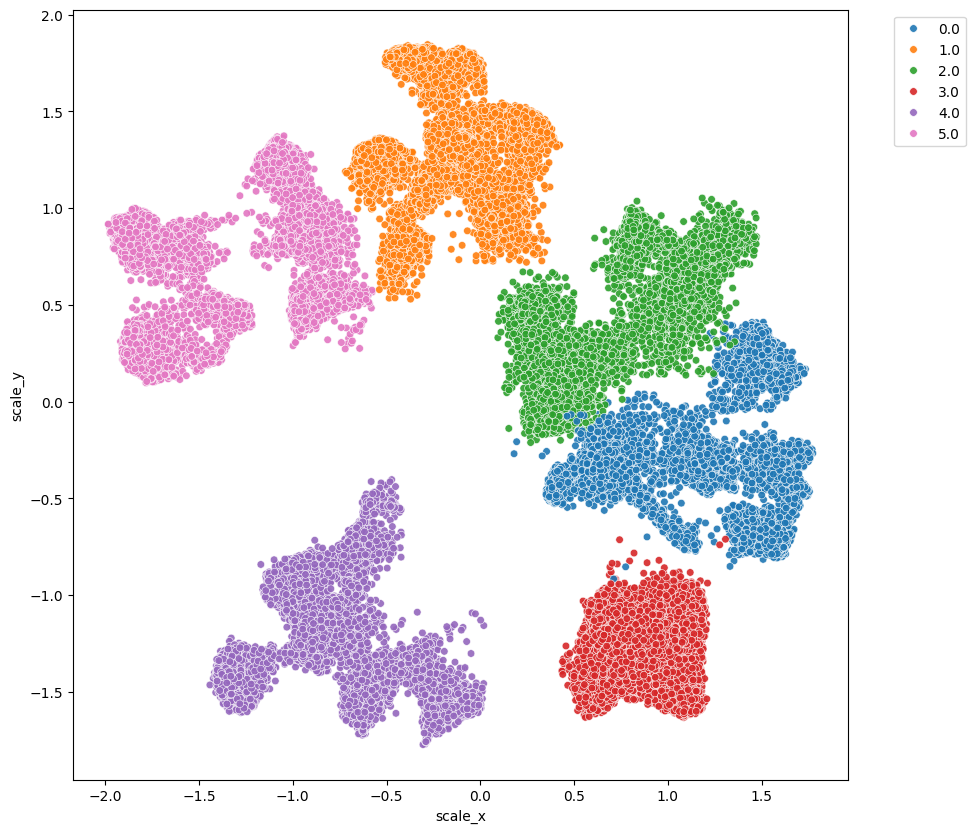

In [10]:
plt.figure(figsize=(10,10))

fixed_palette = {
    0: "#1f77b4",  # 藍
    1: "#ff7f0e",  # 橘
    2: "#2ca02c",  # 綠
    3: "#d62728",  # 紅
    4: "#9467bd",  # 紫
    5: "#e377c2",  # 棕 
}

sns.scatterplot(
    data=filtered_df,
    x="scale_x", y="scale_y",
    hue="cluster",   #class
    s=30, alpha=0.9,
    palette=fixed_palette
)
# plt.title("UMAP on Top 72 Compact Classes", fontsize=14)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

In [11]:
filtered_df.to_csv('background_Umap.csv',sep=',',index=None)

In [12]:
joblib.dump(umap_reducer, "background_Umap_top72.joblib")

['background_Umap_top72.joblib']

In [13]:
df_select_temp = df_select.loc[df_select['class'].isin(['ambulance', 'apple', 'bicycle', 'bus', 'calculator', 'camel',
       'camera', 'campfire', 'car', 'clock', 'crab', 'donut', 'envelope',
       'eyeglasses', 'fish', 'hedgehog', 'helicopter', 'hot air balloon',
       'ice cream', 'laptop', 'lollipop', 'map', 'mushroom', 'octopus',
       'palm tree', 'penguin', 'police car', 'radio', 'see saw', 'shark',
       'spider', 'strawberry', 'tree', 'truck', 'umbrella', 'wheel'])]
df_select_temp

,class,class_id,original_index,e0,e1,e2,e3,e4,e5,e6,...,e502,e503,e504,e505,e506,e507,e508,e509,e510,e511
0,ambulance,0,124531,-0.981268,0.997420,-0.980448,-0.983959,0.667094,0.145938,-0.804226,...,-0.561107,-0.948976,1.000000,0.979677,0.828096,-0.993798,-0.999750,-0.913910,0.690792,-0.019124
1,ambulance,0,11733,-0.812547,0.964438,-0.959373,-0.259086,0.996876,0.630170,-0.996380,...,-0.973204,-0.994172,0.999903,0.650900,-0.440980,-0.995213,-0.825434,0.822330,-0.573541,0.592197
2,ambulance,0,115839,0.818790,0.464012,-0.862255,-0.925267,0.850136,-0.396022,-0.895632,...,0.137394,-0.921945,0.985143,0.668200,0.769520,-0.776454,-0.999609,0.243098,0.881320,0.710422
3,ambulance,0,67566,-0.893669,0.726728,0.247834,0.346493,0.862140,-0.858390,-0.920135,...,-0.901872,-0.581533,0.999809,0.918700,-0.599796,0.805933,-0.976621,0.421758,0.312308,0.148629
4,ambulance,0,88032,0.308319,0.474430,-0.934798,-0.898076,0.998458,-0.823093,-0.909660,...,-0.798747,0.017652,0.956060,-0.288751,0.990881,-0.602251,-0.999407,0.225556,0.526315,0.283429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487995,wheel,243,24962,-0.950526,0.866394,0.975595,-0.930216,-0.923179,-0.873077,-0.287150,...,-0.503018,0.807505,0.999886,0.973857,0.391667,0.969361,-0.975723,-0.743552,0.936711,0.527489
487996,wheel,243,120637,-0.999027,0.964379,0.209183,-0.386971,-0.015040,0.111132,-0.999997,...,-0.708377,-0.584685,0.979003,0.950351,0.261665,-0.882345,-0.940525,-0.714385,0.967633,0.854953
487997,wheel,243,111282,-0.984874,-0.203049,0.591526,0.931793,0.739434,-0.172397,-0.999998,...,-0.217007,0.551054,0.968719,-0.447041,-0.745582,-0.391892,0.034369,0.538708,0.577055,0.700317
487998,wheel,243,78860,-0.992413,0.793282,0.848906,0.361793,0.328938,0.430449,-0.999977,...,-0.295699,-0.030818,0.965408,0.842573,-0.052013,-0.564245,-0.505128,-0.937703,0.942904,0.812717


In [14]:
feature_cols = [c for c in df_select_temp.columns if c.startswith("e")]
df_select_temp = df_select_temp[["class"] + feature_cols]
rename_dict = {old: f"emb_{i}" for i, old in enumerate(feature_cols)}
df_select_temp = df_select_temp.rename(columns=rename_dict)
df_select_temp

,class,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,...,emb_502,emb_503,emb_504,emb_505,emb_506,emb_507,emb_508,emb_509,emb_510,emb_511
0,ambulance,-0.981268,0.997420,-0.980448,-0.983959,0.667094,0.145938,-0.804226,0.987850,0.997001,...,-0.561107,-0.948976,1.000000,0.979677,0.828096,-0.993798,-0.999750,-0.913910,0.690792,-0.019124
1,ambulance,-0.812547,0.964438,-0.959373,-0.259086,0.996876,0.630170,-0.996380,0.095010,0.839141,...,-0.973204,-0.994172,0.999903,0.650900,-0.440980,-0.995213,-0.825434,0.822330,-0.573541,0.592197
2,ambulance,0.818790,0.464012,-0.862255,-0.925267,0.850136,-0.396022,-0.895632,-0.851386,-0.351830,...,0.137394,-0.921945,0.985143,0.668200,0.769520,-0.776454,-0.999609,0.243098,0.881320,0.710422
3,ambulance,-0.893669,0.726728,0.247834,0.346493,0.862140,-0.858390,-0.920135,-0.273055,-0.024691,...,-0.901872,-0.581533,0.999809,0.918700,-0.599796,0.805933,-0.976621,0.421758,0.312308,0.148629
4,ambulance,0.308319,0.474430,-0.934798,-0.898076,0.998458,-0.823093,-0.909660,0.961688,-0.260071,...,-0.798747,0.017652,0.956060,-0.288751,0.990881,-0.602251,-0.999407,0.225556,0.526315,0.283429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487995,wheel,-0.950526,0.866394,0.975595,-0.930216,-0.923179,-0.873077,-0.287150,0.021759,0.996932,...,-0.503018,0.807505,0.999886,0.973857,0.391667,0.969361,-0.975723,-0.743552,0.936711,0.527489
487996,wheel,-0.999027,0.964379,0.209183,-0.386971,-0.015040,0.111132,-0.999997,-0.758922,0.845019,...,-0.708377,-0.584685,0.979003,0.950351,0.261665,-0.882345,-0.940525,-0.714385,0.967633,0.854953
487997,wheel,-0.984874,-0.203049,0.591526,0.931793,0.739434,-0.172397,-0.999998,0.294537,0.788654,...,-0.217007,0.551054,0.968719,-0.447041,-0.745582,-0.391892,0.034369,0.538708,0.577055,0.700317
487998,wheel,-0.992413,0.793282,0.848906,0.361793,0.328938,0.430449,-0.999977,-0.725022,0.652608,...,-0.295699,-0.030818,0.965408,0.842573,-0.052013,-0.564245,-0.505128,-0.937703,0.942904,0.812717


In [ ]:
df_select_temp.to_csv('background_embedding.csv',sep=',',index=None)

In [16]:
filtered_df['class'].unique()

array(['ambulance', 'apple', 'bicycle', 'bus', 'calculator', 'camel',
       'camera', 'campfire', 'car', 'clock', 'crab', 'donut', 'envelope',
       'eyeglasses', 'fish', 'hedgehog', 'helicopter', 'hot air balloon',
       'ice cream', 'laptop', 'lollipop', 'map', 'mushroom', 'octopus',
       'palm tree', 'penguin', 'police car', 'radio', 'see saw', 'shark',
       'spider', 'strawberry', 'tree', 'truck', 'umbrella', 'wheel'],
      dtype=object)